## Credit card customer churn prediction

![](https://images.unsplash.com/photo-1599050751795-6cdaafbc2319?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1100&q=80)
(Photo Credit: [cardmapr](https://unsplash.com/@cardmapr) on [Unsplash](https://unsplash.com/))

Credit card institutions use customer churning to predict who is going to stop using their credit card services. This churn metrics helps institutions improve customer retention.
___

### Goal:
My goal is to predict customer churn from the dataset and gain some insights on how the bank can reduce the customer churn. 

### Table of Contents:
1. Importing Libraries
2. Loading the Dataset
    * Load data into a Pandas DataFrame
    * Print the Datatypes of the dataset    
3. Data Cleaning
    * Remove the duplicates if any
    * Check for the null values in each column
    * Drop unnecessary columns - There are 2 columns which seem unnessary
4. Exploratory Data Analysis and Data Visualization  
    * Customer age distribution to see if customer age is normally distributed.
    * Proportion of customer gender **count** (countplot and piechart)
    * Porportion of existing and attrited customers **count** 
    * Proportion of existing and attrited customers **by gender** (countplot and piechart) 
    * Proportion of entire education levels
    * Proportion of education level **by existing and attrited customer**
    * Proportion of education level **by gender** (pieplot and countplot)
    * Proportion of marital status **by attrited and existing customers** 
    * Correlation using heatmap
    * Proportion of income category
    * Proportion of income category by customer
    * Customer age count by customer
5. Customer Churn Prediciton
    * Preprocessing to transform categorial to numerical to data pridiction
    * Merge categorical and numerical dataframe
    * Test Train Split 
    * RandomForestClassifier
    * Model Building (du XGboost, random forest to fnd the best model score!
6. Conclusion



Aknowledgements:
The original dataset can be found on this [website](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from collections import Counter

## 2. Loading the Dataset

### Load data into a Pandas DataFrame

In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Print the Datatypes of the dataset

In [3]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

* This dataset has 10127 rows and 23 columns

## 3. Data Cleaning

### Drop duplicates if any


In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(10127, 23)

* As you can see, there are no duplicates

### Check for the null values in each column

In [6]:
df.isnull().any()

CLIENTNUM                                                                                                                             False
Attrition_Flag                                                                                                                        False
Customer_Age                                                                                                                          False
Gender                                                                                                                                False
Dependent_count                                                                                                                       False
Education_Level                                                                                                                       False
Marital_Status                                                                                                                        False
Income_Category     

- As you can see, this dataset doesn't have null vaules! 

### Drop unnecessary columns
#### There are 2 columns which seem unnessary

In [7]:
df.drop([df.columns[21],df.columns[22]],axis=1,inplace=True)
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


## 4. Exploratory Data Analysis and Data Visualization

### Customer age distribution

Text(0.5, 1.0, 'Credit Card Customer Age Distribution')

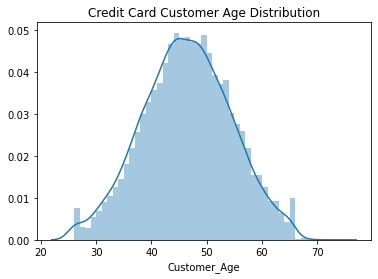

In [8]:
sns.distplot(df['Customer_Age'])
plt.title('Credit Card Customer Age Distribution')

* Customer age is normally distributed. 
* Most of the customer age are clustered around the mean value (between 40 to 60).

### Proportion of customer gender count

In [9]:
#count the number of gender
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

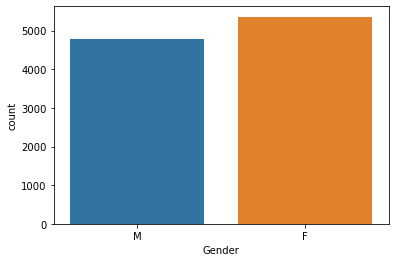

In [10]:
# visualize gender count
sns.countplot(data=df, x='Gender')

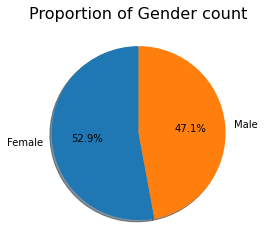

In [11]:
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 16)
plt.show()

* Proportion of gender is almost equally distributed

### Proportion of existing and attrited customers count

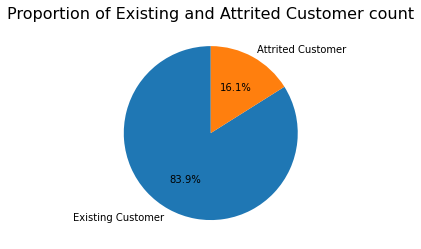

In [12]:
plt.pie(df['Attrition_Flag'].value_counts(), labels = ['Existing Customer', 'Attrited Customer'], 
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Existing and Attrited Customer count', fontsize = 16)
plt.show()

* As you can see, proportion of customer is highly imbalanced compare to proportion of gender count

* So I'd like to see the proportion of existing and attrited customers by Gender! (see below)

### Proportion of existing and attrited customer by gender

Text(0.5, 1.0, 'Existing and Attrted Customers by Gender')

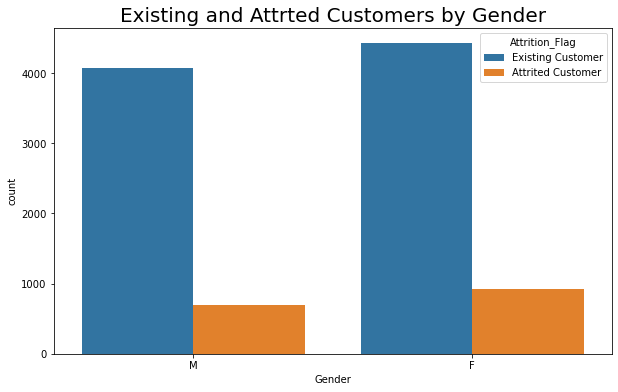

In [13]:
#visualize to see the number of existing and attrited customers by gender
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title('Existing and Attrted Customers by Gender', fontsize=20)

Text(0.5, 1.0, 'Existing Customer vs Gender')

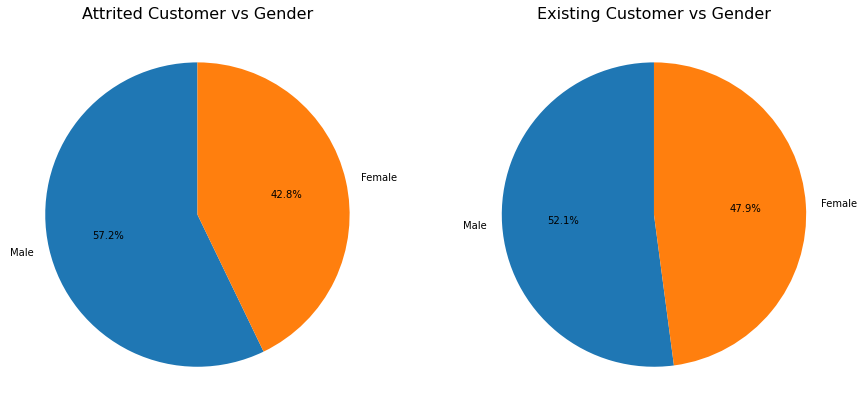

In [14]:
# visualize to see the proportion of existing and attrited customers by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_gender = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
ax1.pie(x=attrited_gender, labels=["Male", "Female"], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Gender', fontsize=16)

existing_gender=df.loc[df["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
ax2.pie(x=existing_gender,labels=["Male","Female"],autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Gender', fontsize=16)

* The proportion of customers by gender in both pie charts is almost compareable. As you can see, there are 14.4% more attrited male than attrited female.  

### Proportion of entire education levels

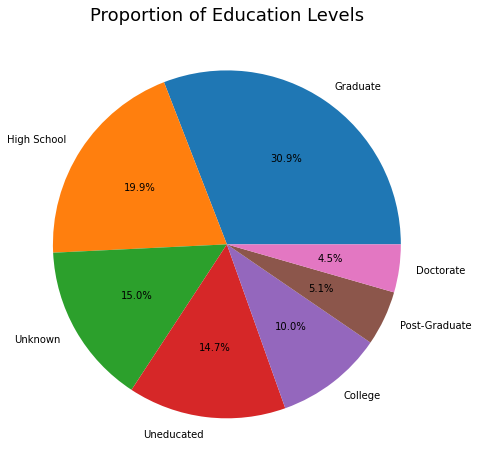

In [15]:
edu = df['Education_Level'].value_counts().to_frame('Counts') 
plt.figure(figsize = (8,8))
plt.pie(edu['Counts'], labels = edu.index, autopct = '%1.1f%%')
plt.title('Proportion of Education Levels', fontsize = 18)
plt.show()

### Proportion of education level by existing and attrited customer

Text(0.5, 1.0, 'Existing Customer vs Education Level')

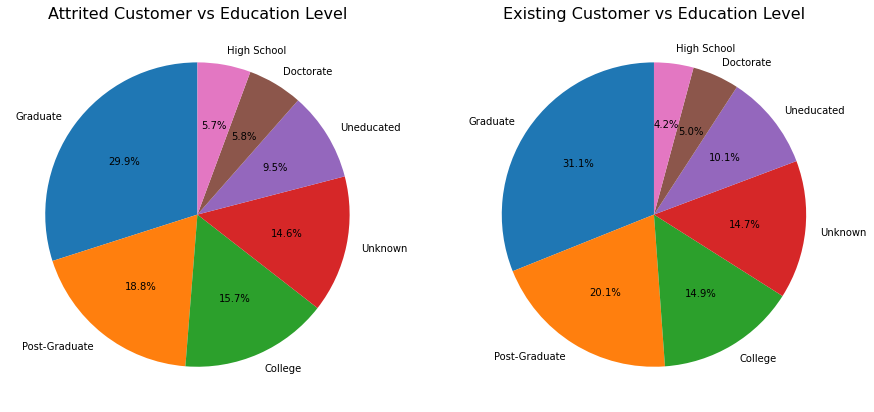

In [16]:
# Proportion of education level by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_edu = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Education Level', fontsize=16)

existing_edu = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Education Level', fontsize=16)


### Proportion of education level by gender

Text(0.5, 1.0, 'Male vs Education Level')

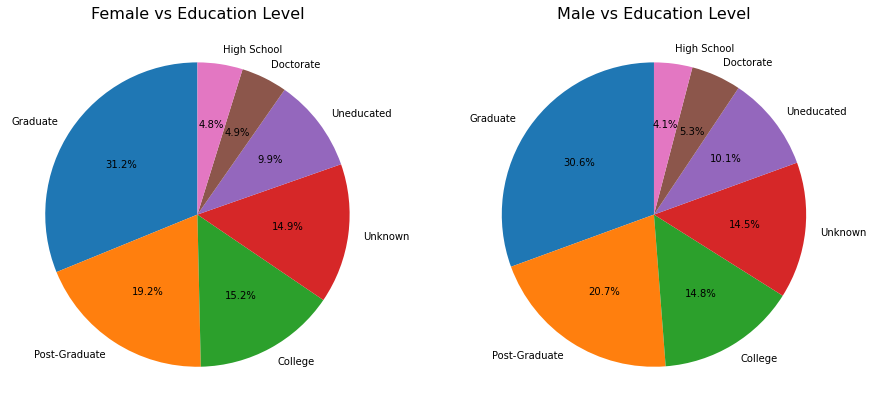

In [17]:
# By pieplot

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_eduprop = df.loc[df["Gender"] == "F", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Female vs Education Level', fontsize=16)

existing_eduprop = df.loc[df["Gender"] == "M", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Male vs Education Level', fontsize=16)



Text(0.5, 1.0, 'Education Level by gender')

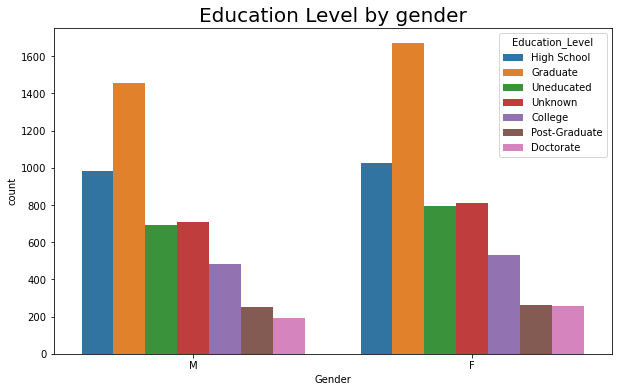

In [18]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Education_Level', data=df)
plt.title('Education Level by gender', fontsize=20)

- Proportion of education level of **both the customers and gender are concentrated on Graduate level, followed by Post-Graduate level

### Proportion of marital status by attrited and existing customers 

In [19]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Existing Customer vs Marital_Status')

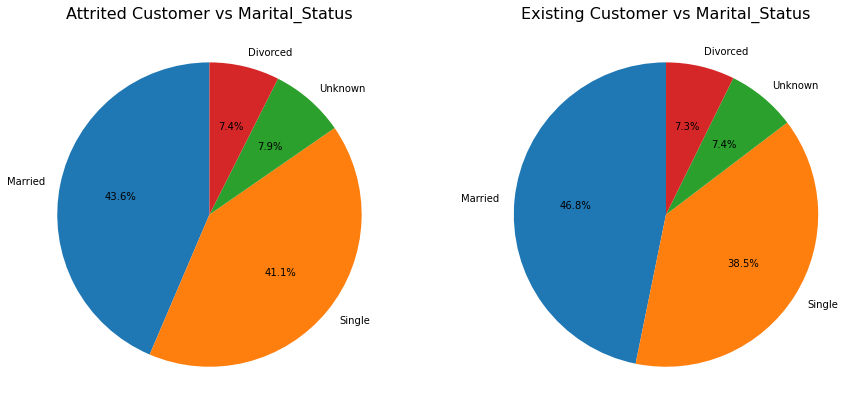

In [20]:
# Proportion of marital status by customer

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_mar = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Marital_Status"]].value_counts().tolist()
ax1.pie(x=attrited_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Marital_Status', fontsize=16)

existing_mar = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Marital_Status"]].value_counts().tolist()
ax2.pie(x=existing_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Marital_Status', fontsize=16)


Text(0.5, 1.0, 'Attrited and Existing Customers by Marital Status')

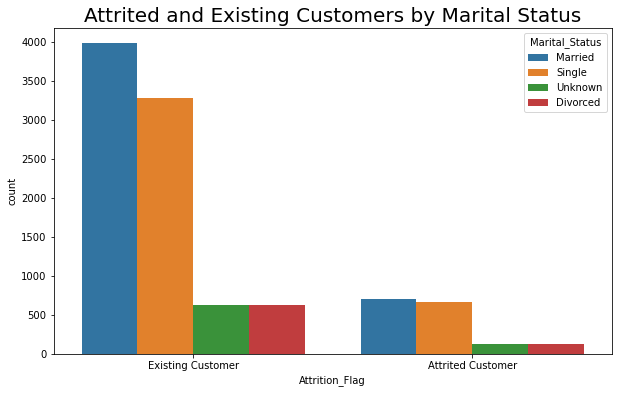

In [21]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition_Flag', hue='Marital_Status', data=df)
plt.title('Attrited and Existing Customers by Marital Status', fontsize=20)

- A high proportion of marital status in attrited customer is Married status (43.6%), followed by Single (41.1%)

### Proportion of income category by customer

Text(0.5, 1.0, 'Existing Customer vs Income_Category')

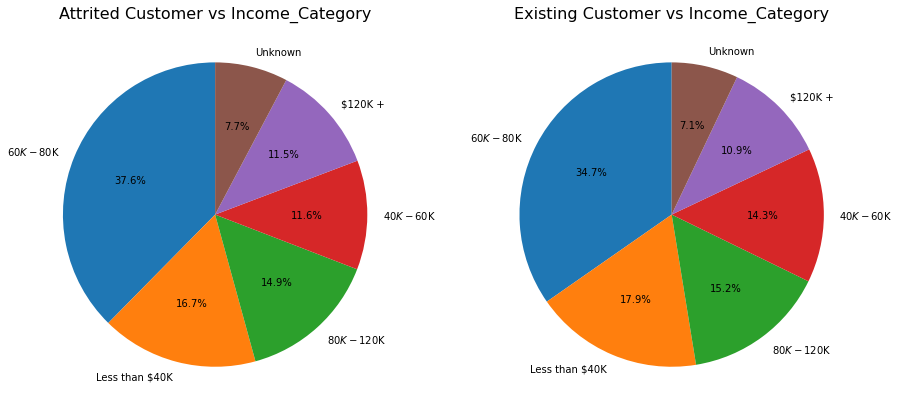

In [22]:
# Proportion of income category by customer

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
count = Counter(df['Income_Category'])

attrited_inc = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Income_Category"]].value_counts().tolist()
ax1.pie(x=attrited_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Income_Category', fontsize=16)

existing_inc = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Income_Category"]].value_counts().tolist()
ax2.pie(x=existing_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Income_Category', fontsize=16)


- The proportion of income category of both attrited and existing customers shows us that it is highy concentrated around 60K-80K income.

## Correlation using heatmap 

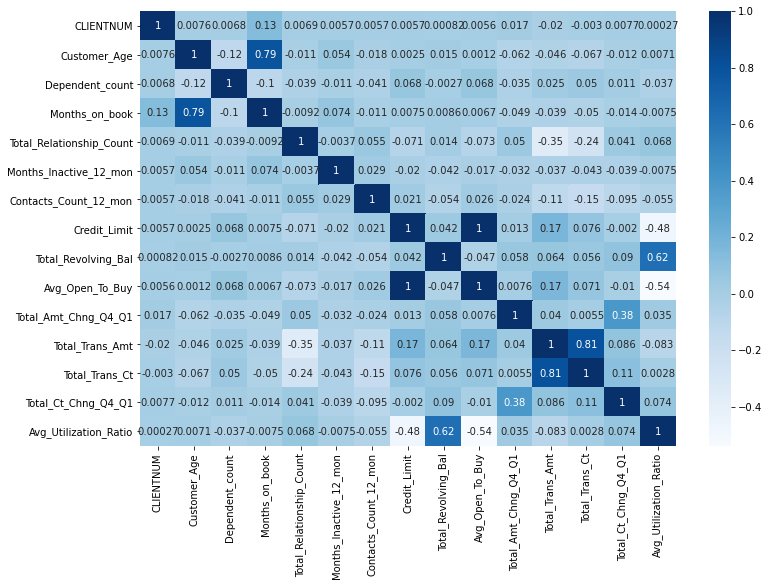

In [23]:
f, ax = plt.subplots(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True, cmap="Blues") 
plt.show()

### Customer age count by customer

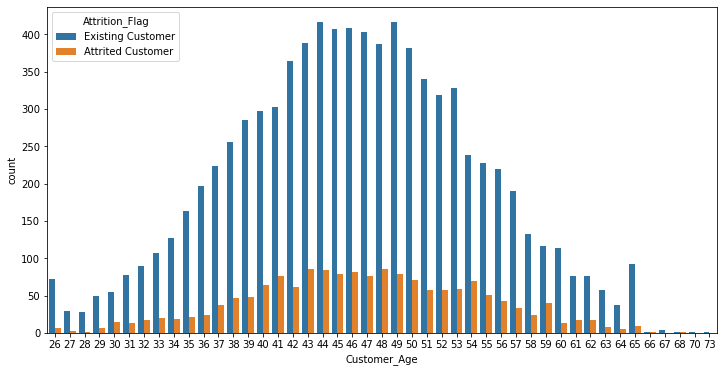

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='Customer_Age', data=df, hue='Attrition_Flag')

# 5. Customer Churn Prediciton

Since we require **numerical values** for the predictive model ,the categorical columns need to be transformed. Hence **label encoding** is done.

### Preprocessing to transform categorial to numerical to data pridiction

In [25]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV

In [26]:
df_categorical = df[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]
df_categorical.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


In [27]:
df_numerical = df[['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
df_numerical.head()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [28]:
enc = OneHotEncoder()
df_categorical_enc = pd.DataFrame(enc.fit_transform(df_categorical).toarray())
df_categorical_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Merge categorical and numerical dataframe

In [29]:
df_all = pd.concat([df_categorical_enc, df_numerical], axis=1)
df_all.head()

,0,1,2,3,4,5,6,7,8,9,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [30]:
X = df_all

In [31]:
y = df['Attrition_Flag']

In [32]:
le = LabelEncoder()
y = le.fit_transform(y)

### Test Train Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
target_names = ['Attrited Customer', 'Existing Customer']

In [36]:
parameters_randomforest = {'n_estimators':range(10,400,5), 'max_depth':range(2,8,2)}

### RandomForestClassifier

In [37]:
randomforest = RandomForestClassifier(class_weight = 'balanced')
clf_randomforest = RandomizedSearchCV(randomforest, parameters_randomforest, random_state=0)
clf_randomforest.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'max_depth': range(2, 8, 2),
                                        'n_estimators': range(10, 400, 5)},
                   random_state=0)

In [38]:
y_pred_randomforest = clf_randomforest.predict(X_test)

In [39]:
average_precision_score(y_test, y_pred_randomforest), roc_auc_score(y_test, y_pred_randomforest)

(0.9658024405307248, 0.9049612789060418)

In [40]:
print(classification_report(y_test, y_pred_randomforest, target_names=target_names))

                   precision    recall  f1-score   support

Attrited Customer       0.70      0.88      0.78       496
Existing Customer       0.98      0.93      0.95      2543

         accuracy                           0.92      3039
        macro avg       0.84      0.90      0.87      3039
     weighted avg       0.93      0.92      0.92      3039



In [41]:
parameters_gb = {'learning_rate':(0.1,0.01), 'n_estimators':range(10,400,5),
                'max_depth':range(2,8,2)
              }

In [42]:
gb = GradientBoostingClassifier()

clf_gb = RandomizedSearchCV(gb, parameters_gb, random_state=0)

clf_gb.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': (0.1, 0.01),
                                        'max_depth': range(2, 8, 2),
                                        'n_estimators': range(10, 400, 5)},
                   random_state=0)

In [43]:
y_pred_gb = clf_gb.predict(X_test)

In [44]:
average_precision_score(y_test, y_pred_gb), roc_auc_score(y_test, y_pred_gb)

(0.975701462445667, 0.9350938058934709)

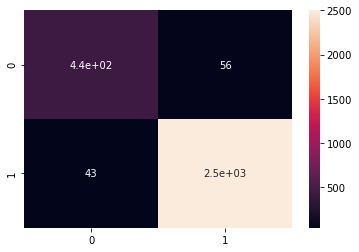

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True)

In [46]:
print(classification_report(y_test, y_pred_gb, target_names=target_names))

                   precision    recall  f1-score   support

Attrited Customer       0.91      0.89      0.90       496
Existing Customer       0.98      0.98      0.98      2543

         accuracy                           0.97      3039
        macro avg       0.94      0.94      0.94      3039
     weighted avg       0.97      0.97      0.97      3039



In [47]:
clf_lg = LogisticRegression(C=0.5, penalty='l2',n_jobs=6, random_state=0)

clf_lg.fit(X_train, y_train)

LogisticRegression(C=0.5, n_jobs=6, random_state=0)

In [48]:
y_pred_lg = clf_lg.predict(X_test)

In [49]:
average_precision_score(y_test, y_pred_lg), roc_auc_score(y_test, y_pred_lg)

(0.9053344396480075, 0.7315396946710133)

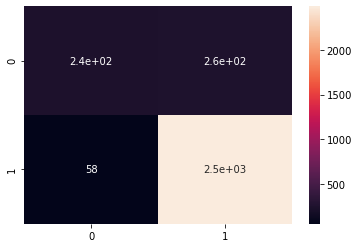

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred_lg), annot=True)

In [51]:
print(classification_report(y_test, y_pred_lg, target_names=target_names))

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.49      0.61       496
Existing Customer       0.91      0.98      0.94      2543

         accuracy                           0.90      3039
        macro avg       0.86      0.73      0.77      3039
     weighted avg       0.89      0.90      0.89      3039



In [52]:
y_pred_all = (0.5*y_pred_gb) + (y_pred_randomforest*0.3) + (y_pred_lg*0.2)

In [53]:
average_precision_score(y_test, y_pred_all), roc_auc_score(y_test, y_pred_all)

(0.9869535751871934, 0.9640355244631055)

## 6. Conclusion

### How can the bank stop the credit card customers who have churned?
[](http://)
   * There are 16.07% of customers who have churned.
   * The proportion of gender count is almost equally distributed (52.9% male and 47.1%) compare to proportion of existing and attributed customer count (83.9% and 16.1%) which is highly impbalanced.
   * The proportion of attrited customers by gender **there are 14.4% more male than female who have churned** 
   * **Customers who have churned are highly educated** - A high proportion of education level of attrited customer is Graduate level (29.9%), followed by Post-Graduate level (18.8%)** 
   * A high proportion of marital status of customers who have cuhurned is Married (43.6%), followed by Single (41.1%) compared to Divorced (7.4%) and Unknown (7.9%) status  - **marital stuats of the attributed customers are highly clustered in Married status and Single** 
   * As you  can see from the proportion of income category of attrited customer, it is highy concentrated around 60K - 80K income (37.6%), followed by Less than 40K income (16.7%) compare to attrited customers with higher annual income of 80K-120K(14.9%) and over 120K+ (11.5%). **I assume that customers with higher income doon't likely leave their credit card services than meddle-income customers** 